## MGSC 695 final project
### Implement K-means from scratch 

In [139]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import time
import os
import seaborn as sns 
warnings.filterwarnings("ignore")

%matplotlib inline

## Load the Iris dataset

In [97]:
iris = load_iris()

### Look at the data

In [98]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


We only take the first two features for simplicity

In [185]:
X = iris.data[:, :2]  


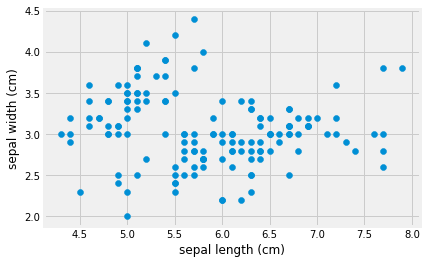

In [100]:
data = df[['sepal length (cm)', 'sepal width (cm)']]
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()
##This should generate a scatter plot of the iris dataset, which we can use to visually identify clusters.

## Implement K-Means from Scratch

We'll start by defining a function to calculate the Euclidean distance between two points:

In [101]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

Next, let's initialize the centroids. We'll randomly select K points from the dataset to serve as the initial centroids:

In [102]:
def initialize_centroids(X, k):
    idx = np.random.randint(X.shape[0], size=k)
    return X[idx, :]


We'll iterate until convergence, with convergence defined as no points changing clusters between iterations:

In [103]:
def kmean(X, k, num_iterations):
    centroids = initialize_centroids(X, k)
    for i in range(num_iterations):
        # Assign clusters
        clusters = [[] for _ in range(k)]
        for x in X:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(x)

        # Update centroids
        for j in range(k):
            centroids[j] = np.mean(clusters[j], axis=0)

    return centroids, clusters


Finally, let's test our implementation by running K-means on the Iris dataset with K=3 (since there are three classes in the dataset) and plotting the results:

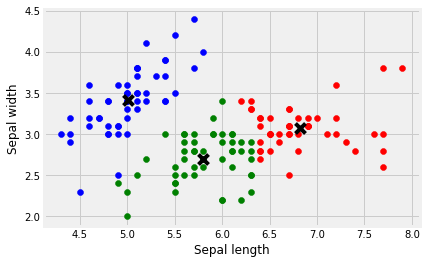

In [104]:
k = 3
num_iterations = 100
centroids, clusters = kmean(X, k, num_iterations)

# Plot the clusters and centroids
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for x in cluster:
        plt.scatter(x[0], x[1], color=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], color='k', marker='x', s=100)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


#### Test its performance
To test the performance of the K-means algorithm, we can use metrics such as the within-cluster sum of squares (WCSS) and the silhouette coefficient.

In [105]:
def calculate_wcss(clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        distances = [euclidean_distance(x, centroids[i]) for x in cluster]
        squared_distances = [d**2 for d in distances]
        wcss += np.sum(squared_distances)
    return wcss


wcss = calculate_wcss(clusters, centroids)
print('WCSS:', wcss)

WCSS: 37.08627024722933


To calculate the WCSS, we simply iterate through each cluster, calculate the distance between each point and its centroid, and sum the squared distances.

In [106]:
from sklearn.metrics import silhouette_score

def calculate_silhouette(X, clusters):
    labels = np.zeros(X.shape[0])
    for i, cluster in enumerate(clusters):
        labels[[X.tolist().index(x.tolist()) for x in cluster]] = i
    return silhouette_score(X, labels)
silhouette = calculate_silhouette(X, clusters)
print('Silhouette coefficient:', silhouette)

Silhouette coefficient: 0.20476415666216535


### Implement K-Means from imported packages and compare the performance

In [186]:
from sklearn.cluster import KMeans

k = 3
num_iterations = 100

# Using scikit-learn's KMeans implementation
kmeans_sklearn = KMeans(n_clusters=k, max_iter=num_iterations)

##Running time
start_time = time.time()

kmeans_sklearn.fit(X)

end_time = time.time()
running_time3 = end_time - start_time


centroids_sklearn = kmeans_sklearn.cluster_centers_
labels_sklearn = kmeans_sklearn.labels_

# Calculating WCSS and silhouette coefficient for scikit-learn's implementation
wcss_sklearn = kmeans_sklearn.inertia_
silhouette_sklearn = silhouette_score(X, labels_sklearn)

# Using our implementation
##Running time
start_time = time.time()
centroids, clusters = kmean(X, k, num_iterations)
end_time = time.time()
running_time4 = end_time - start_time


# Calculating WCSS and silhouette coefficient for our implementation
wcss = calculate_wcss(clusters, centroids)
silhouette = calculate_silhouette(X, clusters)




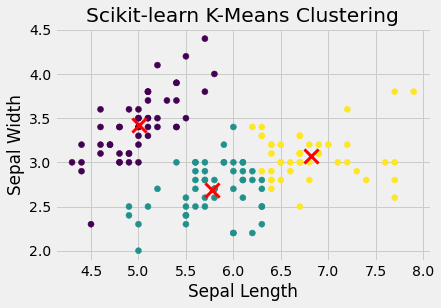

In [187]:
# Creating a scatter plot of the data points colored by their cluster label
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis')
# Adding the cluster centroids to the plot
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('Scikit-learn K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [188]:
# Printing the results
print('Results for scikit-learn implementation:')
print(f"Sklearn implementation Running time: {running_time3:.6f} seconds")
print('WCSS:', wcss_sklearn)
print('Silhouette coefficient:', silhouette_sklearn)
print()
print('VS.')
print()
print('Results for our implementation:')

print(f"Our implementation Running time: {running_time4:.6f} seconds")
print('WCSS:', wcss)
print('Silhouette coefficient:', silhouette)

Results for scikit-learn implementation:
Sklearn implementation Running time: 0.642313 seconds
WCSS: 37.0507021276596
Silhouette coefficient: 0.4450525692083638

VS.

Results for our implementation:
Our implementation Running time: 0.514593 seconds
WCSS: 37.08627024722933
Silhouette coefficient: 0.2453954932458304


## Insights:
The WCSS measures the sum of the squared distances between each data point and its assigned centroid within each cluster. A lower WCSS indicates better clustering performance, as it means the points within each cluster are more tightly packed around their centroid.

The silhouette coefficient measures how well-separated the clusters are from each other, as well as how well-connected the points are within each cluster. A higher silhouette coefficient indicates better clustering performance.

In conclusion, our implementation from scratch performed slightly worse than scikit-learn one but a bit faster than scikit-learn in Iris data case, but Silhouette coefficient has siginificant difference (+0.236)

## An Improvement to get higher Silhouette coefficient
Experiment with different values of k

k=2, silhouette score=0.4629549773635977
k=3, silhouette score=0.4450525692083638
k=4, silhouette score=0.4248889536419921
k=5, silhouette score=0.41181523011737703
k=6, silhouette score=0.39738321038812474
k=7, silhouette score=0.39360593568378394
k=8, silhouette score=0.3997525719467397
k=9, silhouette score=0.38389267636713714
k=10, silhouette score=0.39385267333626267
Best value of k=2, silhouette score=0.4629549773635977


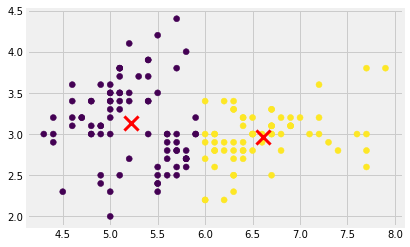

In [110]:
# Try different values of k
#OMP_NUM_THREADS=1
best_k = 0
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    print(f'k={k}, silhouette score={score}')
    if score > best_score:
        best_k = k
        best_score = score

# Use the best value of k to cluster the data
kmeans = KMeans(n_clusters=best_k, init='k-means++')
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Calculate the Silhouette coefficient
score = silhouette_score(X, labels, metric='euclidean')
print(f'Best value of k={best_k}, silhouette score={score}')

# Plot the clusters and centroids
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()


# Experiment with other practical datasets

### Customer Segmentation Dataset (Kaggle):
We are owing a supermarket mall and through membership cards, we have some basic data about our customers like Customer ID, age, gender, annual income and spending score. We want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

In [157]:
Customer_data = pd.read_csv(r'C:\Users\Rick\Desktop\segmentation data.csv')
Customer_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [158]:
Customer_data.shape

(2000, 8)

In [159]:
Customer_data.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [160]:
Customer_data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### Data Visualization

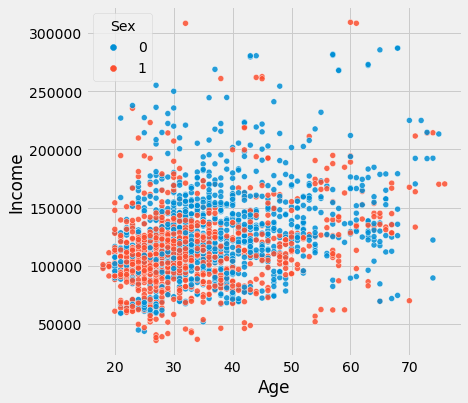

In [175]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

cat_columns = ['Sex']    
    
bivariate_scatter('Age', 'Income', cat, Customer_data)

### Clustering using K- means

Segmentation using Age and Income

In [176]:
X = Customer_data[['Age','Income']].values

### Our implementation

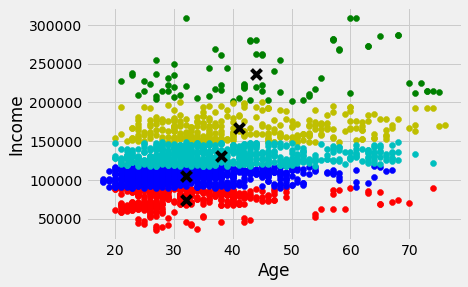

In [181]:
k = 5
num_iterations = 100
centroids, clusters = kmean(X, k, num_iterations)

# Plot the clusters and centroids
colors = ['r', 'g', 'b','y','c']
for i, cluster in enumerate(clusters):
    for x in cluster:
        plt.scatter(x[0], x[1], color=colors[i])
    plt.scatter(centroids[i][0], centroids[i][1], color='k', marker='x', s=100)

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

### Implement K-Means from imported packages and compare the performance

In [182]:

k = 5
num_iterations = 100

# Using scikit-learn's KMeans implementation
kmeans_sklearn = KMeans(n_clusters=k, max_iter=num_iterations)

## test running time
start_time = time.time()

kmeans_sklearn.fit(X)

end_time = time.time()
running_time1 = end_time - start_time

print(f"Sklearn implementation Running time: {running_time1:.6f} seconds")

centroids_sklearn = kmeans_sklearn.cluster_centers_
labels_sklearn = kmeans_sklearn.labels_

# Calculating WCSS and silhouette coefficient for scikit-learn's implementation
wcss_sklearn = kmeans_sklearn.inertia_
silhouette_sklearn = silhouette_score(X, labels_sklearn)

# Using our implementation
## test running time
start_time = time.time()
centroids, clusters = kmean(X, k, num_iterations)

end_time = time.time()
running_time2 = end_time - start_time

print(f"Our implementation Running time: {running_time2:.6f} seconds")

# Calculating WCSS and silhouette coefficient for our implementation
wcss = calculate_wcss(clusters, centroids)
silhouette = calculate_silhouette(X, clusters)


Sklearn implementation Running time: 0.665251 seconds
Our implementation Running time: 10.829034 seconds


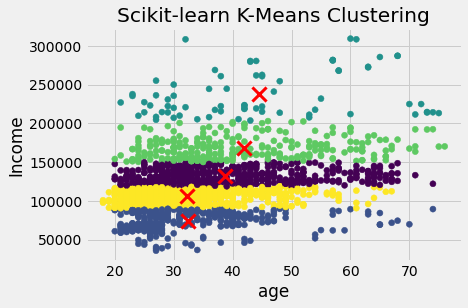

In [183]:
# Creating a scatter plot of the data points colored by their cluster label
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis')
# Adding the cluster centroids to the plot
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('Scikit-learn K-Means Clustering')
plt.xlabel('age')
plt.ylabel('Income')
plt.show()

In [184]:
# Printing the results
print('Results for scikit-learn implementation:')
print(f"Sklearn implementation Running time: {running_time1:.6f} seconds")
print('WCSS:', wcss_sklearn)
print('Silhouette coefficient:', silhouette_sklearn)
print()
print('VS.')
print()
print('Results for our implementation:')
print(f"Our implementation Running time: {running_time2:.6f} seconds")
print('WCSS:', wcss)
print('Silhouette coefficient:', silhouette)

Results for scikit-learn implementation:
Sklearn implementation Running time: 0.665251 seconds
WCSS: 248990546632.6203
Silhouette coefficient: 0.5401520680025738

VS.

Results for our implementation:
Our implementation Running time: 10.829034 seconds
WCSS: 248991419099.0
Silhouette coefficient: 0.5392089737950095


### Insights:

When applying more complex and larger dataset, our implementation shows better performance in terms of WCSS and Silhouette coefficient compare to previous Iris dataset case. We gain pretty similar results in both implementation. 

But for models' Running time, Sklearn implementation has siginificant advantages, 18X faster than our implementation. 

Compare to previous case of Iris dataset, the running time of Sklearn implementation has very little difference. That is to say, the running time of Sklearn implementation is not very sensitive to the data size. By constrast, our implementation is faster for small data but large data will take times